The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


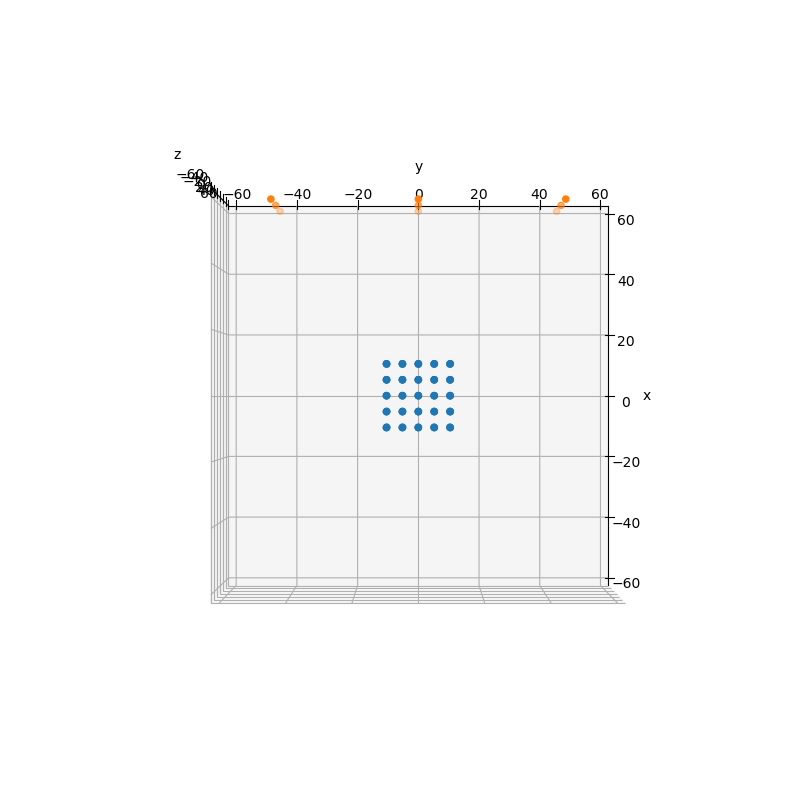

In [92]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

from mpl_toolkits import mplot3d
import utility
import tracing
import numpy as np
import matplotlib.pyplot as plt

# Sample Settings
s_offset_x = 0
s_offset_y = 0
s_offset_z = 0
s_num_x = 5
s_num_y = 5
s_num_z = 5
s_gap = 5

# Camera Settings
c_offset_x = 60
c_offset_y = 0
c_offset_z = 0
c_num_x = 1
c_num_y = 3
c_num_z = 3
c_gap = 45

  
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')
  
# Data for a three-dimensional line
# Sample
xl,yl,zl = utility.generate_points_array(s_offset_x,s_offset_y,s_offset_z,s_num_x,s_num_y,s_num_z,s_gap)
ax.scatter3D(xl, yl, zl)
#print(xl)

# Camera
xv,yv,zv = utility.generate_points_array(c_offset_x,c_offset_y,c_offset_z,c_num_x,c_num_y,c_num_z,c_gap)
ax.scatter3D(xv, yv, zv, 'green')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.set(scaled = 'equal')
ax.set_xlim(-60,60)
ax.set_ylim(-60,60)
ax.set_zlim(-60,60)
#ax.set(xlim=(-40,40),ylim=(-40,40),zlim=(-40,40),option='equal')
plt.autoscale(enable=False, axis='both', tight=None)
ax.dist = 100

#delta_az, delta_el = utility.get_angles(60,0,5)

delta_az = 0
delta_el = -90
ax.view_init(delta_el,delta_az)
  
plt.show()

Using matplotlib backend: module://ipympl.backend_nbagg
[[[-45 -45 -45]]

 [[  0   0   0]]

 [[ 45  45  45]]]


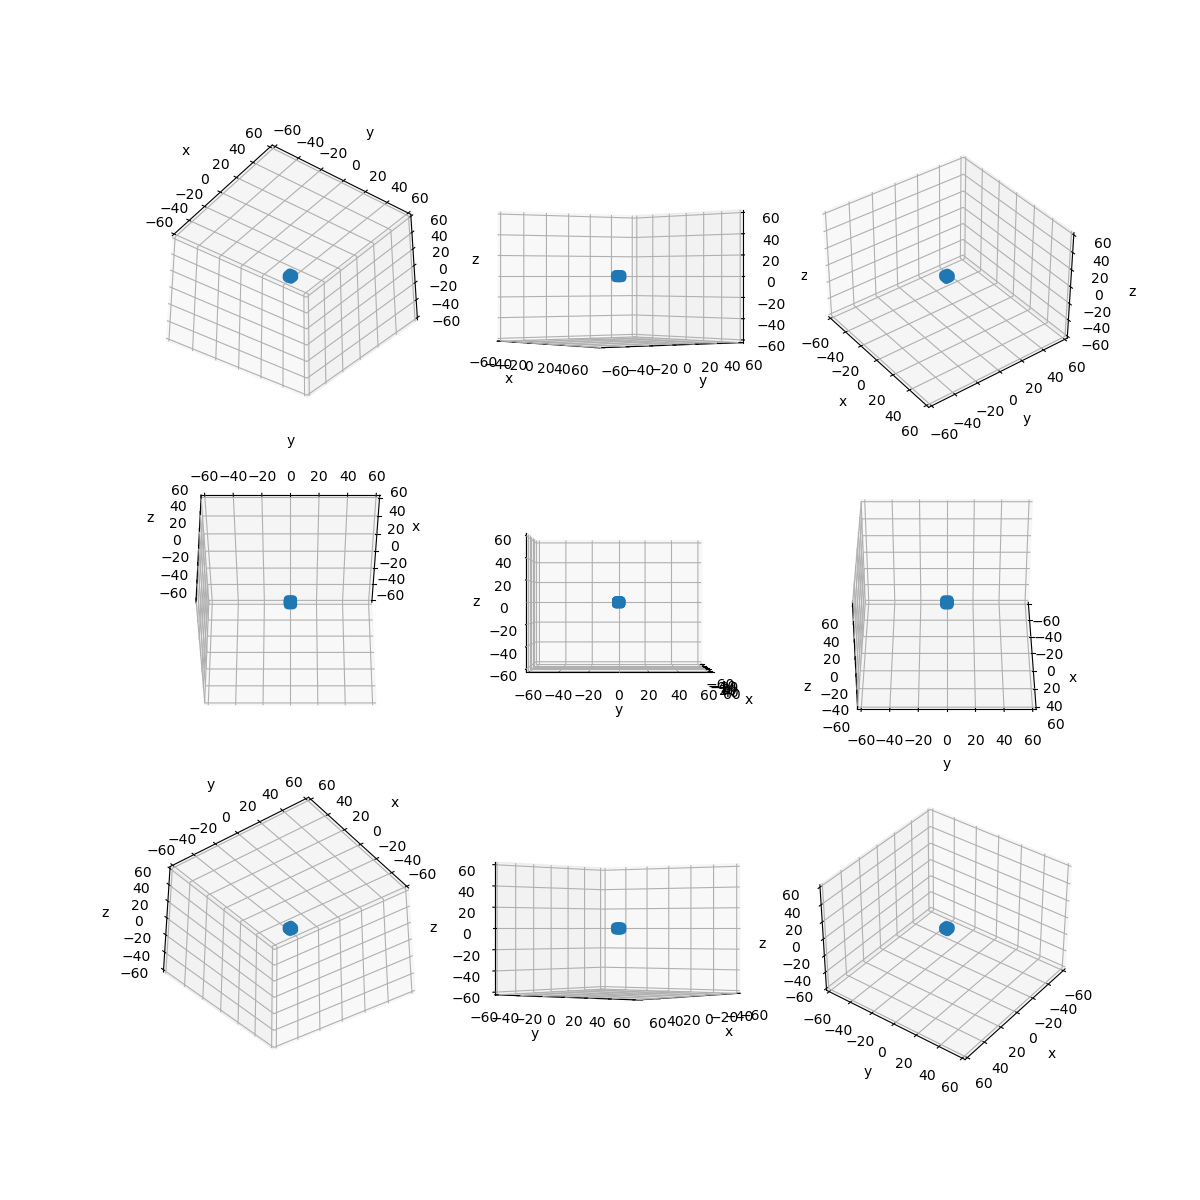

In [54]:
%matplotlib auto 
print(yv)
fig = plt.figure(figsize = (12, 12))
subidx = 1
for i in range(c_num_y*c_num_z):
    ax = fig.add_subplot(c_num_y,c_num_z,subidx,projection='3d')
    subidx += 1
    ax.set_xlim(-60,60)
    ax.set_ylim(-60,60)
    ax.set_zlim(-60,60)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter3D(xl, yl, zl)
    delta_az, delta_el = utility.get_angles(c_offset_x,yv.ravel()[i],zv.ravel()[i])
    ax.view_init(delta_el,delta_az)
        


In [55]:
sample_list = []

xl = xl.ravel()
yl = yl.ravel()
zl = zl.ravel()
for i in range (len(xl)):
    sample = np.array([xl[i],yl[i],zl[i]])
    sample_list.append(sample)

camera_list = []

xv = xv.ravel()
yv = yv.ravel()
zv = zv.ravel()
for i in range (len(xv)):
    camera = np.array([xv[i],yv[i],zv[i]])
    camera_list.append(camera)

In [56]:
camera_hits = tracing.get_all_hits(sample_list,camera_list,1)
#print(camera_hits)

In [57]:
print(tracing.get_visiable_percentage(camera_hits,sample_list))

0.584


In [84]:
def visible_pipeline(s_num_x,s_num_y,s_num_z,s_gap,c_num_y,c_num_z,c_gap,resolution):
    # Sample Settings
    s_offset_x = 0
    s_offset_y = 0
    s_offset_z = 0
   

    # Camera Settings
    c_offset_x = 60
    c_offset_y = 0
    c_offset_z = 0
    c_num_x = 1

    xl,yl,zl = utility.generate_points_array(s_offset_x,s_offset_y,s_offset_z,s_num_x,s_num_y,s_num_z,s_gap)
    xv,yv,zv = utility.generate_points_array(c_offset_x,c_offset_y,c_offset_z,c_num_x,c_num_y,c_num_z,c_gap)

    sample_list = []

    xl = xl.ravel()
    yl = yl.ravel()
    zl = zl.ravel()
    for i in range (len(xl)):
        sample = np.array([xl[i],yl[i],zl[i]])
        sample_list.append(sample)

    camera_list = []

    xv = xv.ravel()
    yv = yv.ravel()
    zv = zv.ravel()
    for i in range (len(xv)):
        camera = np.array([xv[i],yv[i],zv[i]])
        camera_list.append(camera)

    camera_hits = tracing.get_all_hits(sample_list,camera_list,resolution)
    #print(tracing.get_visible_percentage(camera_hits,sample_list))
    return tracing.get_visible_percentage(camera_hits,sample_list)


In [62]:
visible_res = visible_pipeline(s_num_x=5,s_num_y=5,s_num_z=5,s_gap=5,c_num_y=3,c_num_z=3,c_gap=45,1)
print(visible_res)

0.984


In [68]:
# Test Sparsity
# Same FoV

# Sample Settings
s_offset_x = 0
s_offset_y = 0
s_offset_z = 0
s_num_x = 5
s_num_y = 5
s_num_z = 5
s_gap = 5

# Camera Settings
c_offset_x = 60
c_offset_y = 0
c_offset_z = 0
c_num_x = 1
c_num_y = 3
c_num_z = 3
c_gap = 45

fov = (s_num_x-1)*s_gap
sparsity = fov**3/s_num_x**3

for i in range(5,11):
    s_num_x = i
    s_num_y = i
    s_num_z = i
    s_gap = fov/(s_num_x-1)
    sparsity = fov**3/s_num_x**3
    print(sparsity)
    print(visible_pipeline(s_num_x,s_num_y,s_num_z,s_gap,c_num_y=3,c_num_z=3,c_gap=45,1))









64.0
0.984
37.03703703703704
0.9444444444444444
23.323615160349853
0.8717201166180758
15.625
0.828125
10.973936899862826
0.7489711934156379
8.0
0.616


In [70]:
sparsity_x = [64.0,37.03703703703704,23.323615160349853,15.625,10.973936899862826,8.0]
visibility_y = [0.984,0.9444444444444444,0.8717201166180758,0.828125,0.7489711934156379,0.616]
plt.plot(sparsity_x,visibility_y)

In [74]:
# Test Lens Density
# Same Sample Points

# Sample Settings
s_offset_x = 0
s_offset_y = 0
s_offset_z = 0
s_num_x = 5
s_num_y = 5
s_num_z = 5
s_gap = 6

# Camera Settings
c_offset_x = 60
c_offset_y = 0
c_offset_z = 0
c_num_x = 1
c_num_y = 5
c_num_z = 5
c_gap = 10

c_width = (c_num_y-1)*c_gap

for i in range(2,9):

    c_num_y = i
    c_num_z = i
    c_gap = c_width / (i-1)
    c_density = float(i**2/c_width**2)

    print(c_density)
    print(visible_pipeline(s_num_x,s_num_y,s_num_z,s_gap,c_num_y,c_num_z,c_gap,1))
    
density_x = [0.0025,0.005625,0.01,0.015625,0.0225,0.030625,0.04]
visibility_y = [0.984,0.984,1.0,1.0,1.0,1.0,1.0]

0.0025
0.984
0.005625
0.984
0.01
1.0
0.015625
1.0
0.0225
1.0
0.030625
1.0
0.04
1.0


In [80]:
# Test Lens Distribution Area
# Same samples, same lens, different lens gaps


# Sample Settings
s_offset_x = 0
s_offset_y = 0
s_offset_z = 0
s_num_x = 5
s_num_y = 5
s_num_z = 5
s_gap = 3

# Camera Settings
c_offset_x = 60
c_offset_y = 0
c_offset_z = 0
c_num_x = 1
c_num_y = 3
c_num_z = 3
c_gap = 45

distribution_x = []
visibility_y = []

for i in range(5,65,4):
    c_gap = i
    c_distribution = c_gap*(c_num_y-1)
    distribution_x.append(c_distribution)
    visibility_y.append(visible_pipeline(s_num_x,s_num_y,s_num_z,s_gap,c_num_y,c_num_z,c_gap,1))
    

In [81]:
print(distribution_x)
print(visibility_y)

[10, 18, 26, 34, 42, 50, 58, 66, 74, 82, 90, 98, 106, 114, 122]
[0.752, 0.8, 0.792, 0.824, 0.856, 0.816, 0.784, 0.784, 0.816, 0.88, 0.944, 0.88, 0.84, 0.712, 0.712]


In [85]:
# Test Resolution
# Same samples, same lens, different sample size


# Sample Settings
s_offset_x = 0
s_offset_y = 0
s_offset_z = 0
s_num_x = 5
s_num_y = 5
s_num_z = 5
s_gap = 5

# Camera Settings
c_offset_x = 60
c_offset_y = 0
c_offset_z = 0
c_num_x = 1
c_num_y = 3
c_num_z = 3
c_gap = 45

sample_size_x = []
visibility_y = []

for i in range(1,10):
    resolution = i * 0.5
    sample_size_x.append(resolution)
    visibility_y.append(visible_pipeline(s_num_x,s_num_y,s_num_z,s_gap,c_num_y,c_num_z,c_gap,resolution))

In [86]:
print(sample_size_x)
print(visibility_y)

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
[0.984, 0.984, 0.944, 0.816, 0.712, 0.68, 0.584, 0.584, 0.584]
